# 01. Data Exploration

This notebook explores the PlantVillage tomato leaf dataset:
- Dataset structure and statistics
- Class distribution
- Sample visualization
- Image properties (resolution, color distribution)

**Author**: Kuan-Chen, Chen  
**Dataset**: PlantVillage Tomato Leaves (11,000 images)

## 1. Setup and Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
from collections import Counter
import pandas as pd
from tqdm import tqdm

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Dataset Paths Configuration

In [2]:
# Dataset paths
BASE_DIR = Path('..').resolve()
TRAIN_DIR = BASE_DIR / 'tomato' / 'train'
VAL_DIR = BASE_DIR / 'tomato' / 'val'

print(f"Base directory: {BASE_DIR}")
print(f"Training directory: {TRAIN_DIR}")
print(f"Validation directory: {VAL_DIR}")
print(f"\nTrain dir exists: {TRAIN_DIR.exists()}")
print(f"Val dir exists: {VAL_DIR.exists()}")

Base directory: C:\Users\Champion\Documents\GitHub\term-project
Training directory: C:\Users\Champion\Documents\GitHub\term-project\tomato\train
Validation directory: C:\Users\Champion\Documents\GitHub\term-project\tomato\val

Train dir exists: True
Val dir exists: True


## 3. Dataset Statistics

In [3]:
def count_images_per_class(data_dir):
    """Count images in each class folder."""
    class_counts = {}
    
    for class_dir in sorted(data_dir.iterdir()):
        if class_dir.is_dir():
            # Count image files
            image_files = list(class_dir.glob('*.jpg')) + list(class_dir.glob('*.JPG')) + \
                         list(class_dir.glob('*.png')) + list(class_dir.glob('*.PNG'))
            class_counts[class_dir.name] = len(image_files)
    
    return class_counts

# Count images
train_counts = count_images_per_class(TRAIN_DIR)
val_counts = count_images_per_class(VAL_DIR)

# Create summary DataFrame
df_stats = pd.DataFrame({
    'Class': list(train_counts.keys()),
    'Train': list(train_counts.values()),
    'Validation': list(val_counts.values())
})
df_stats['Total'] = df_stats['Train'] + df_stats['Validation']

print("\n" + "="*80)
print("DATASET STATISTICS")
print("="*80)
print(df_stats.to_string(index=False))
print("="*80)
print(f"\nTotal Training Images: {df_stats['Train'].sum():,}")
print(f"Total Validation Images: {df_stats['Validation'].sum():,}")
print(f"Total Images: {df_stats['Total'].sum():,}")
print(f"Number of Classes: {len(df_stats)}")
print("="*80)


DATASET STATISTICS
                                        Class  Train  Validation  Total
                      Tomato___Bacterial_spot   2000         200   2200
                        Tomato___Early_blight   2000         200   2200
                             Tomato___healthy   2000         200   2200
                         Tomato___Late_blight   1998         200   2198
                           Tomato___Leaf_Mold   2000         200   2200
                  Tomato___Septoria_leaf_spot   2000         200   2200
Tomato___Spider_mites Two-spotted_spider_mite   2000         200   2200
                         Tomato___Target_Spot   2000         200   2200
                 Tomato___Tomato_mosaic_virus   2000         200   2200
       Tomato___Tomato_Yellow_Leaf_Curl_Virus   2000         200   2200

Total Training Images: 19,998
Total Validation Images: 2,000
Total Images: 21,998
Number of Classes: 10


## 4. Class Distribution Visualization

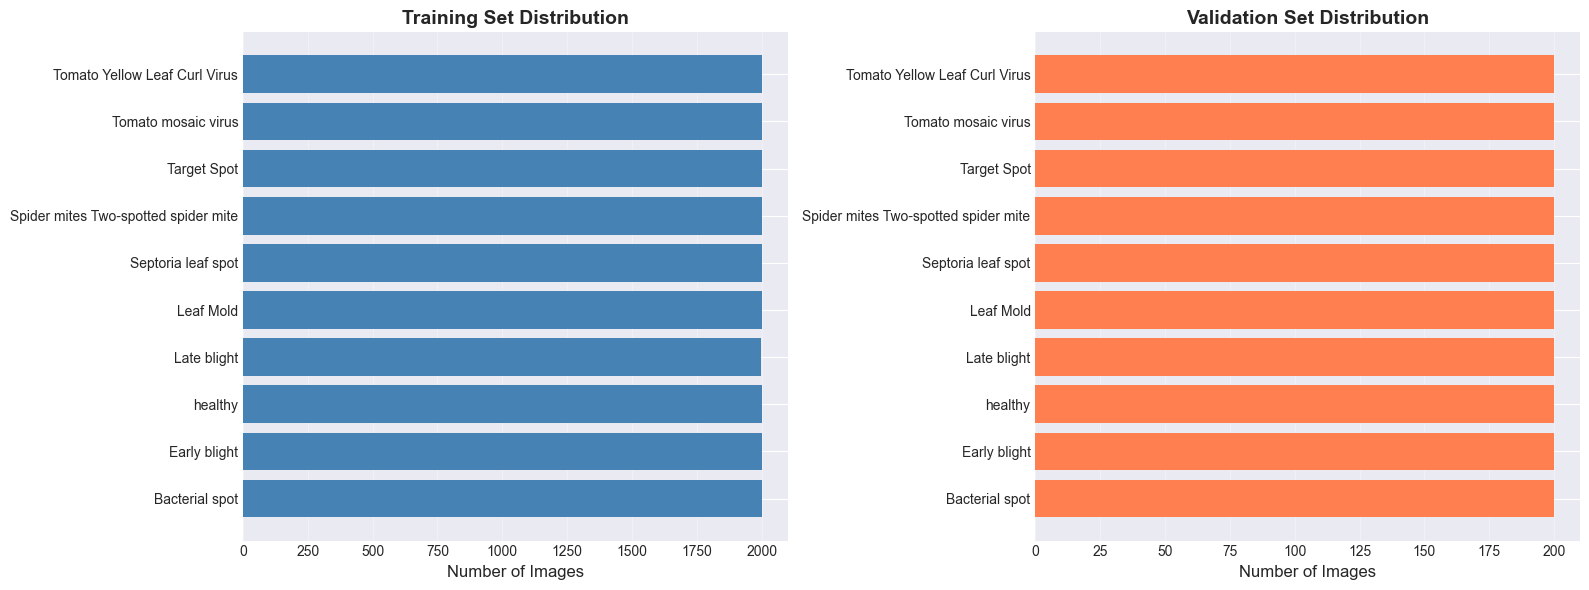


Dataset Balance Analysis:
Training set std: 0.63 (perfectly balanced if 0)
Validation set std: 0.00

✗ Dataset is imbalanced


In [4]:
# Simplify class names for visualization
def simplify_class_name(name):
    """Simplify class name for better readability."""
    return name.replace('Tomato___', '').replace('_', ' ')

df_stats['Class_Short'] = df_stats['Class'].apply(simplify_class_name)

# Plot class distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set distribution
axes[0].barh(df_stats['Class_Short'], df_stats['Train'], color='steelblue')
axes[0].set_xlabel('Number of Images', fontsize=12)
axes[0].set_title('Training Set Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Validation set distribution
axes[1].barh(df_stats['Class_Short'], df_stats['Validation'], color='coral')
axes[1].set_xlabel('Number of Images', fontsize=12)
axes[1].set_title('Validation Set Distribution', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig(BASE_DIR / 'notebooks' / 'class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Check if dataset is balanced
train_std = df_stats['Train'].std()
val_std = df_stats['Validation'].std()

print(f"\nDataset Balance Analysis:")
print(f"Training set std: {train_std:.2f} (perfectly balanced if 0)")
print(f"Validation set std: {val_std:.2f}")
print(f"\n{'✓' if train_std == 0 else '✗'} Dataset is {'perfectly balanced' if train_std == 0 else 'imbalanced'}")

## 5. Sample Images Visualization

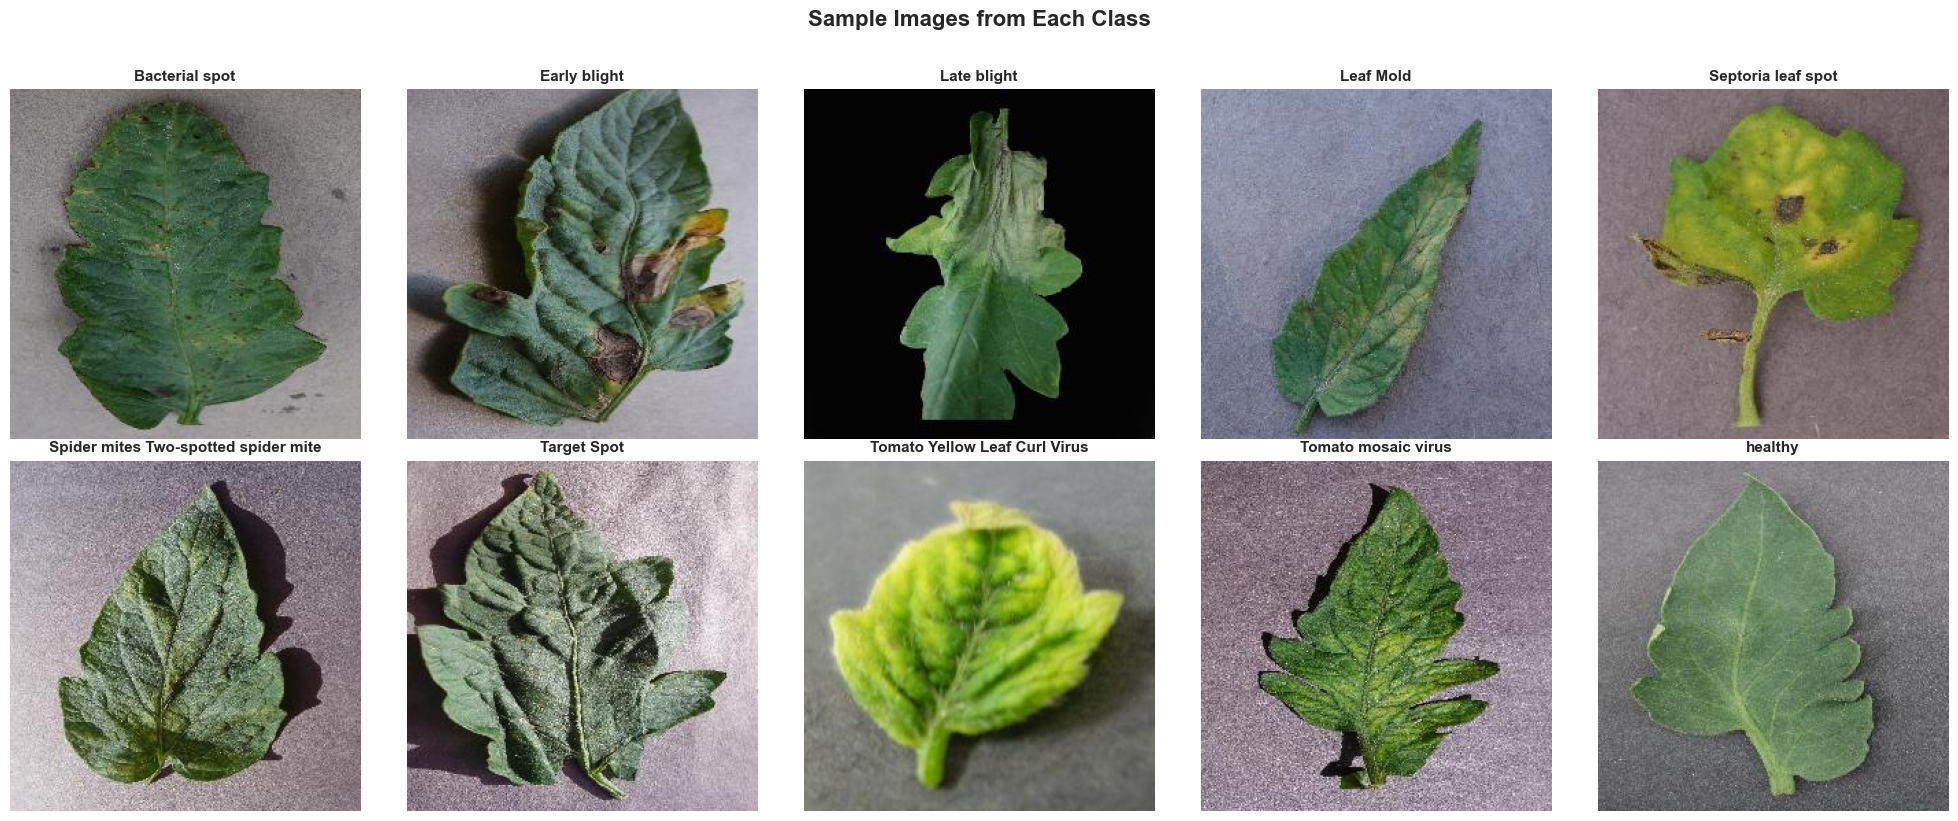

In [5]:
def get_sample_images(data_dir, n_samples=1):
    """Get random sample images from each class."""
    samples = {}
    
    for class_dir in sorted(data_dir.iterdir()):
        if class_dir.is_dir():
            image_files = list(class_dir.glob('*.jpg')) + list(class_dir.glob('*.JPG'))
            if image_files:
                sample_files = np.random.choice(image_files, min(n_samples, len(image_files)), replace=False)
                samples[class_dir.name] = [str(f) for f in sample_files]
    
    return samples

# Get sample images
sample_images = get_sample_images(TRAIN_DIR, n_samples=1)

# Visualize samples
n_classes = len(sample_images)
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for idx, (class_name, image_paths) in enumerate(sorted(sample_images.items())):
    img = Image.open(image_paths[0])
    axes[idx].imshow(img)
    axes[idx].set_title(simplify_class_name(class_name), fontsize=11, fontweight='bold')
    axes[idx].axis('off')

plt.suptitle('Sample Images from Each Class', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(BASE_DIR / 'notebooks' / 'sample_images.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Image Properties Analysis

In [6]:
def analyze_image_properties(data_dir, n_samples=100):
    """Analyze image properties (resolution, color distribution)."""
    resolutions = []
    aspect_ratios = []
    file_sizes = []
    
    # Collect all image paths
    all_images = []
    for class_dir in data_dir.iterdir():
        if class_dir.is_dir():
            all_images.extend(list(class_dir.glob('*.jpg')) + list(class_dir.glob('*.JPG')))
    
    # Sample images
    sampled_images = np.random.choice(all_images, min(n_samples, len(all_images)), replace=False)
    
    print(f"Analyzing {len(sampled_images)} sample images...")
    
    for img_path in tqdm(sampled_images):
        img = Image.open(img_path)
        width, height = img.size
        resolutions.append((width, height))
        aspect_ratios.append(width / height)
        file_sizes.append(os.path.getsize(img_path) / 1024)  # KB
    
    return resolutions, aspect_ratios, file_sizes

# Analyze images
resolutions, aspect_ratios, file_sizes = analyze_image_properties(TRAIN_DIR, n_samples=200)

# Extract width and height
widths = [r[0] for r in resolutions]
heights = [r[1] for r in resolutions]

# Print statistics
print("\n" + "="*60)
print("IMAGE PROPERTIES STATISTICS")
print("="*60)
print(f"Resolution (Width):")
print(f"  Min: {min(widths)}px, Max: {max(widths)}px, Mean: {np.mean(widths):.1f}px")
print(f"\nResolution (Height):")
print(f"  Min: {min(heights)}px, Max: {max(heights)}px, Mean: {np.mean(heights):.1f}px")
print(f"\nAspect Ratio:")
print(f"  Min: {min(aspect_ratios):.3f}, Max: {max(aspect_ratios):.3f}, Mean: {np.mean(aspect_ratios):.3f}")
print(f"\nFile Size:")
print(f"  Min: {min(file_sizes):.1f}KB, Max: {max(file_sizes):.1f}KB, Mean: {np.mean(file_sizes):.1f}KB")
print("="*60)

# Most common resolution
resolution_counts = Counter(resolutions)
most_common_res = resolution_counts.most_common(1)[0]
print(f"\nMost common resolution: {most_common_res[0]} ({most_common_res[1]} images)")

Analyzing 200 sample images...


100%|██████████| 200/200 [00:00<00:00, 1643.80it/s]


IMAGE PROPERTIES STATISTICS
Resolution (Width):
  Min: 256px, Max: 256px, Mean: 256.0px

Resolution (Height):
  Min: 256px, Max: 256px, Mean: 256.0px

Aspect Ratio:
  Min: 1.000, Max: 1.000, Mean: 1.000

File Size:
  Min: 8.0KB, Max: 26.7KB, Mean: 16.8KB

Most common resolution: (256, 256) (200 images)


## 7. Color Distribution Analysis

Analyzing color distribution from 100 images...


100%|██████████| 100/100 [00:00<00:00, 799.27it/s]


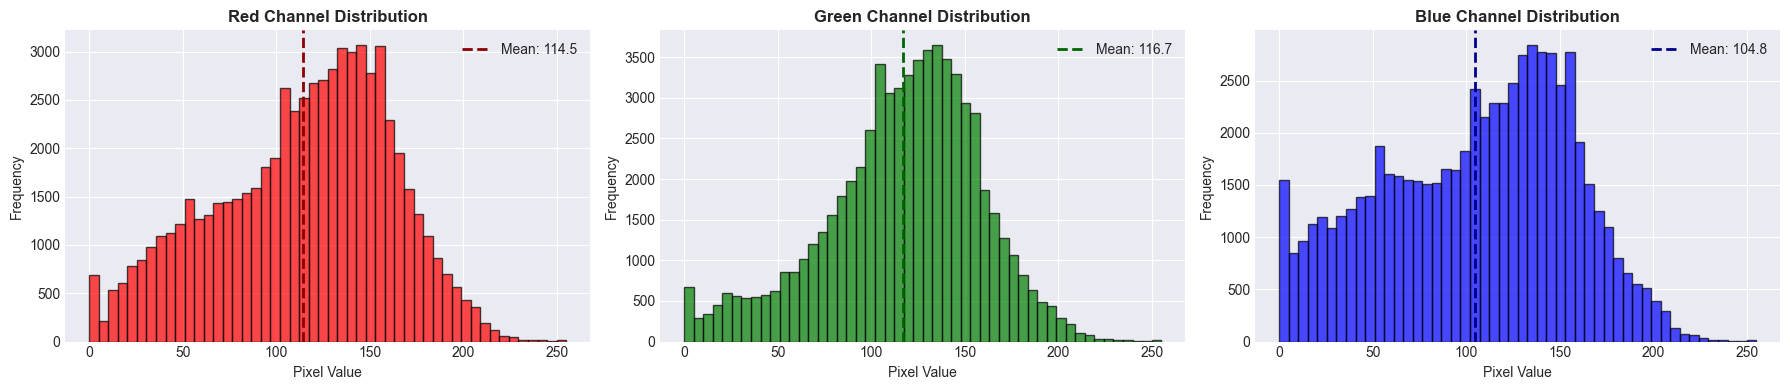


Color Channel Statistics:
  Red   - Mean: 114.5, Std: 47.5
  Green - Mean: 116.7, Std: 41.7
  Blue  - Mean: 104.8, Std: 51.1

Observation: Green channel has highest mean (typical for leaf images)


In [7]:
def analyze_color_distribution(data_dir, n_samples=50):
    """Analyze RGB color distribution across dataset."""
    r_values = []
    g_values = []
    b_values = []
    
    # Collect all image paths
    all_images = []
    for class_dir in data_dir.iterdir():
        if class_dir.is_dir():
            all_images.extend(list(class_dir.glob('*.jpg')) + list(class_dir.glob('*.JPG')))
    
    # Sample images
    sampled_images = np.random.choice(all_images, min(n_samples, len(all_images)), replace=False)
    
    print(f"Analyzing color distribution from {len(sampled_images)} images...")
    
    for img_path in tqdm(sampled_images):
        img = Image.open(img_path).convert('RGB')
        img_array = np.array(img)
        
        # Sample pixels (to avoid memory issues)
        sampled_pixels = img_array.reshape(-1, 3)[::100]  # Every 100th pixel
        
        r_values.extend(sampled_pixels[:, 0])
        g_values.extend(sampled_pixels[:, 1])
        b_values.extend(sampled_pixels[:, 2])
    
    return r_values, g_values, b_values

# Analyze color distribution
r_vals, g_vals, b_vals = analyze_color_distribution(TRAIN_DIR, n_samples=100)

# Plot color distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].hist(r_vals, bins=50, color='red', alpha=0.7, edgecolor='black')
axes[0].set_title('Red Channel Distribution', fontweight='bold')
axes[0].set_xlabel('Pixel Value')
axes[0].set_ylabel('Frequency')
axes[0].axvline(np.mean(r_vals), color='darkred', linestyle='--', linewidth=2, label=f'Mean: {np.mean(r_vals):.1f}')
axes[0].legend()

axes[1].hist(g_vals, bins=50, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('Green Channel Distribution', fontweight='bold')
axes[1].set_xlabel('Pixel Value')
axes[1].set_ylabel('Frequency')
axes[1].axvline(np.mean(g_vals), color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: {np.mean(g_vals):.1f}')
axes[1].legend()

axes[2].hist(b_vals, bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[2].set_title('Blue Channel Distribution', fontweight='bold')
axes[2].set_xlabel('Pixel Value')
axes[2].set_ylabel('Frequency')
axes[2].axvline(np.mean(b_vals), color='darkblue', linestyle='--', linewidth=2, label=f'Mean: {np.mean(b_vals):.1f}')
axes[2].legend()

plt.tight_layout()
plt.savefig(BASE_DIR / 'notebooks' / 'color_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nColor Channel Statistics:")
print(f"  Red   - Mean: {np.mean(r_vals):.1f}, Std: {np.std(r_vals):.1f}")
print(f"  Green - Mean: {np.mean(g_vals):.1f}, Std: {np.std(g_vals):.1f}")
print(f"  Blue  - Mean: {np.mean(b_vals):.1f}, Std: {np.std(b_vals):.1f}")
print(f"\nObservation: Green channel has highest mean (typical for leaf images)")

## 8. Summary and Conclusions

In [8]:
print("\n" + "="*80)
print("DATA EXPLORATION SUMMARY")
print("="*80)
print("\n1. DATASET COMPOSITION:")
print(f"   • Total images: {df_stats['Total'].sum():,}")
print(f"   • Number of classes: {len(df_stats)}")
print(f"   • Training samples: {df_stats['Train'].sum():,}")
print(f"   • Validation samples: {df_stats['Validation'].sum():,}")
print(f"   • Dataset balance: {'Perfect' if train_std == 0 else 'Imbalanced'}")

print("\n2. IMAGE PROPERTIES:")
print(f"   • Typical resolution: {most_common_res[0]}")
print(f"   • Average file size: {np.mean(file_sizes):.1f} KB")
print(f"   • Aspect ratio range: {min(aspect_ratios):.3f} - {max(aspect_ratios):.3f}")

print("\n3. COLOR CHARACTERISTICS:")
print(f"   • Dominant channel: Green (mean: {np.mean(g_vals):.1f})")
print(f"   • Color space: RGB")
print(f"   • Consistent with natural leaf imagery")

print("\n4. NEXT STEPS:")
print("   • Preprocess images (resize to 224x224)")
print("   • Apply background removal")
print("   • Extract texture features (GLCM, fractal, vein)")
print("   • Train CNN classifier")
print("="*80)


DATA EXPLORATION SUMMARY

1. DATASET COMPOSITION:
   • Total images: 21,998
   • Number of classes: 10
   • Training samples: 19,998
   • Validation samples: 2,000
   • Dataset balance: Imbalanced

2. IMAGE PROPERTIES:
   • Typical resolution: (256, 256)
   • Average file size: 16.8 KB
   • Aspect ratio range: 1.000 - 1.000

3. COLOR CHARACTERISTICS:
   • Dominant channel: Green (mean: 116.7)
   • Color space: RGB
   • Consistent with natural leaf imagery

4. NEXT STEPS:
   • Preprocess images (resize to 224x224)
   • Apply background removal
   • Extract texture features (GLCM, fractal, vein)
   • Train CNN classifier


## 9. Export Statistics

In [9]:
# Save statistics to CSV
output_path = BASE_DIR / 'notebooks' / 'dataset_statistics.csv'
df_stats.to_csv(output_path, index=False)
print(f"✓ Dataset statistics saved to: {output_path}")

# Save summary
summary = {
    'total_images': int(df_stats['Total'].sum()),
    'n_classes': len(df_stats),
    'train_images': int(df_stats['Train'].sum()),
    'val_images': int(df_stats['Validation'].sum()),
    'typical_resolution': most_common_res[0],
    'avg_file_size_kb': float(np.mean(file_sizes)),
    'color_means': {
        'red': float(np.mean(r_vals)),
        'green': float(np.mean(g_vals)),
        'blue': float(np.mean(b_vals))
    }
}

import json
summary_path = BASE_DIR / 'notebooks' / 'dataset_summary.json'
with open(summary_path, 'w') as f:
    json.dump(summary, f, indent=2)
print(f"✓ Dataset summary saved to: {summary_path}")

print("\n✓ Data exploration complete!")

✓ Dataset statistics saved to: C:\Users\Champion\Documents\GitHub\term-project\notebooks\dataset_statistics.csv
✓ Dataset summary saved to: C:\Users\Champion\Documents\GitHub\term-project\notebooks\dataset_summary.json

✓ Data exploration complete!
